In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import seaborn as sns

In [2]:
model = tf.keras.models.load_model('combine_prediction_model.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1856      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12417 (48.50 KB)
Trainable params: 12417 (48.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
sampled_df = pd.read_csv('sampled_data.csv')
print(sampled_df.head())

   Year POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  Vert Leap (in)  \
0  2009   K        72.88           220     4.78           22            33.0   
1  1989  DE        75.50           256     4.85           20            31.4   
2  2020  DE        76.88           264     4.74           20            33.5   
3  2016  WR        68.13           185     4.29           13            40.5   
4  1994   C        74.60           270     4.90           19            30.7   

   Broad Jump (in)  Shuttle  3Cone  Pro Bowl  
0              113     4.45   7.31         1  
1              110     4.44   7.31         1  
2              116     4.46   7.31         1  
3              129     4.06   6.53         1  
4              111     4.47   7.31         1  


In [4]:
categorical_col = ['Year', 'POS']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(sampled_df[categorical_col]).toarray()

In [5]:
numerical_col = ["Height (in)", "Weight (lbs)", "40 Yard", "Bench Press", "Vert Leap (in)", "Broad Jump (in)", "Shuttle", "3Cone"]
scalar = StandardScaler()
scaled_numerical_features = scalar.fit_transform(sampled_df[numerical_col])

In [6]:
preprocessed_data = pd.concat([pd.DataFrame(encoded_features), pd.DataFrame(scaled_numerical_features)], axis=1)
print(preprocessed_data.head())

    0    1    2    3    4    5    6    7    8    9   ...   47   48        0   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.353978   
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.641482   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.165809   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0 -2.158725   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.299530   

         1         2         3         4         5         6         7   
0 -0.458351 -0.012407  0.341786  0.081594 -0.152096  0.246981  0.087014  
1  0.353445  0.236111 -0.011422 -0.320301 -0.503379  0.202489  0.087014  
2  0.533844 -0.154417 -0.011422  0.207186  0.199188  0.291473  0.087014  
3 -1.247598 -1.752029 -1.247649  1.965474  1.721417 -1.488221 -2.464217  
4  0.669144  0.413623 -0.188026 -0.496129 -0.386285  0.335966  0.087014  

[5 rows x 57 columns]


In [7]:
labels = sampled_df["Pro Bowl"]
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.1, random_state=42)

In [8]:
#print(X_test)
#print(y_test)
#print(labels)

In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
pred_results = model.predict(X_test)

6/6 [==============================] - 0s 600us/step


In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, pred_results.round())  # Round to 0 or 1 for binary classification

# Calculate precision
precision = precision_score(y_test, pred_results.round())

# Calculate recall
recall = recall_score(y_test, pred_results.round())

# Calculate F1-score
f1 = f1_score(y_test, pred_results.round())

# Calculate ROC AUC score (only applicable for binary classification)
roc_auc = roc_auc_score(y_test, pred_results)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.592391304347826
Precision: 0.5423728813559322
Recall: 0.7529411764705882
F1-score: 0.6305418719211823
ROC AUC: 0.6263814616755793


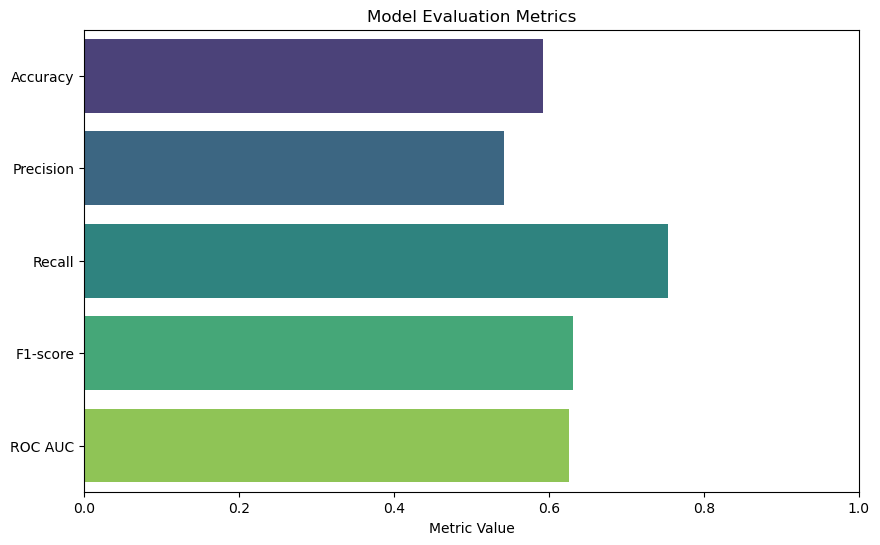

In [12]:
# Define the metric names and corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
metric_values = [accuracy, precision, recall, f1, roc_auc]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_values, y=metric_names, palette="viridis")
plt.xlabel("Metric Value")
plt.title("Model Evaluation Metrics")
plt.xlim(0, 1)  # Set the x-axis limit to match the range of metric values (0 to 1)
plt.show()